<a href="https://colab.research.google.com/github/cr21/Behavior-of-Linear-Model-Machine-Learning-Study/blob/main/LinearModelVarianceStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)

Mounted at /content/drive/


In [44]:
import numpy as np
import pandas as pd
import plotly
import plotly.figure_factory as ff
import plotly.graph_objs as go
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt


In [4]:
cd drive/MyDrive/AI_dataset/8_LinearModels/

/content/drive/.shortcut-targets-by-id/1BiHVEnsCpP-UmVK0W6upN-kOzI1a93Sb/8_LinearModels


In [5]:
ls

 8A_LR_SVM.ipynb   8D_LR_SVM.ipynb      isotonic_regression_sklearn.ipynb
 8B_LR_SVM.ipynb  '8E&F_LR_SVM.ipynb'   task_b.csv
 8C_LR_SVM.ipynb   calibration.pdf      task_d.csv


In [8]:
data = pd.read_csv('task_b.csv')
data=data.iloc[:,1:]


# <pre font-family="calibri,arial,sans-serif" >Behviour of Linear Model Study on <font color='red'>Variance of features </font></pre>

In [9]:
data.head()

,f1,f2,f3,y
0,-195.871045,-14843.084171,5.532140,1.0
1,-1217.183964,-4068.124621,4.416082,1.0
2,9.138451,4413.412028,0.425317,0.0
3,363.824242,15474.760647,1.094119,0.0
4,-768.812047,-7963.932192,1.870536,0.0


In [25]:
print(data['y'].value_counts())
print("Data is perfectly balanced")

0.0    100
1.0    100
Name: y, dtype: int64
Data is perfectly balanced


In [14]:
data.corr()['y']

f1    0.067172
f2   -0.017944
f3    0.839060
y     1.000000
Name: y, dtype: float64

In [16]:
data.std()

f1      488.195035
f2    10403.417325
f3        2.926662
y         0.501255
dtype: float64

In [95]:
X=data[['f1','f2','f3']].values
Y=data['y'].values
print(X.shape)
print(Y.shape)

(200, 3)
(200,)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



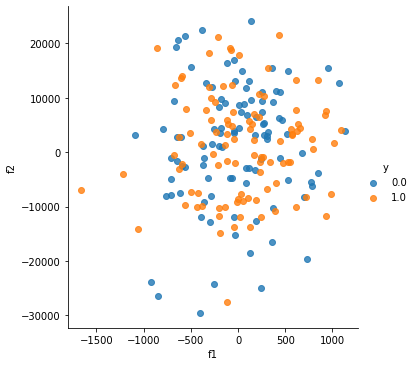

In [60]:
import seaborn as sns
sns.lmplot('f1', 'f2', data, hue='y', fit_reg=False)


# What if our features are with different variance 

<pre>
* <b>As part of this experiment we will observe how linear models work in case of data having feautres with different variance</b>
* <b>from the output of the above cells we can observe that var(F2)>>var(F1)>>Var(F3)</b>

> <b>Experiment 1</b>:
    1. We will apply Logistic regression(SGDClassifier with logloss) on 'data' and check the feature importance
    2. we will apply SVM(SGDClassifier with hinge) on 'data' and check the feature importance

> <b>Experiment 2</b>:
    1. we will apply Logistic regression(SGDClassifier with logloss) on 'data' after standardization 
       i.e standardization(data, column wise): (column-mean(column))/std(column) and check the feature importance
    2. we will apply SVM(SGDClassifier with hinge) on 'data' after standardization 
       i.e standardization(data, column wise): (column-mean(column))/std(column) and check the feature importance

</pre>

# <pre > <font color='red'> Experiment 1 </font></pre>

In [30]:
# Logistic Regression
logistic_clf = LogisticRegression(penalty='l2')


In [20]:
logistic_clf.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
# accuracy of Logistic Regression
score = logistic_clf.score(X,Y)
print("accuracy Logistic Regression ", score)



accuracy Logistic Regression  0.93


In [29]:
# Feature importance
classImportance = logistic_clf.coef_[0]
for id, coeff_ in enumerate(classImportance):
  print(f"f{id+1} coefficient {abs(classImportance[id])} ")

f1 coefficient 0.0008896381130511962 
f2 coefficient 1.0416946094804762e-05 
f3 coefficient 1.9566801565320402 


In [42]:
# SVM classfier
svmLinear = LinearSVC(penalty='l2', loss='hinge', max_iter=100000, tol=10e-5)


In [43]:
svmLinear.fit(X,Y)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=100000, multi_class='ovr',
          penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [61]:
# accuracy of Logistic Regression
score = svmLinear.score(X,Y)
print("accuracy svm classfier ", score)

accuracy svm classfier  0.575


In [94]:
svcImportance = svmLinear.coef_[0]
print("feature importance for SVM")
for id, coeff_ in enumerate(svcImportance):
  print(f"f{id+1} coefficient {abs(svcImportance[id])} ")

feature importance for SVM
f1 coefficient 8.982307584795618e-05 
f2 coefficient 0.0002970061697392157 
f3 coefficient 0.19403735507976852 


### <pre> <font color='red'>Observation from Experiment 1 </font></pre>
> <b>Experiment 1 Result </b>:

    1. Logistic regression fits quiet well and accuracy is also good
    2. SVM linear failed to converge with more than 100000 iteration with hinge loss <br/>
     Highly variance nature of data is affecting the classfier behavior

# <pre > <font color='red'> Experiment 2 </font></pre>

In [96]:
# Scale the feature to zero mean Unit variance
scalar = StandardScaler()
X = scalar.fit_transform(X)

In [97]:
# Logistic Regression on Standaradized data
logistic_clf_standard = LogisticRegression(penalty='l2')


In [98]:
logistic_clf_standard.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [99]:
# accuracy of Logistic Regression
score_stanrard = logistic_clf_standard.score(X,Y)
print("accuracy Logistic Regression with standardized feature", score_stanrard)



accuracy Logistic Regression with standardized feature 0.93


In [100]:
# Feature importance
classImportance_standard = logistic_clf_standard.coef_[0]
print("classs importance on standardized data")
for id, coeff_ in enumerate(classImportance_standard):
  print(f"f{id+1} coefficient {abs(classImportance_standard[id])} ")

classs importance on standardized data
f1 coefficient 0.24105482944744727 
f2 coefficient 0.07588844908289774 
f3 coefficient 3.903568993476378 


In [106]:
# Run Same Experiment on SVM
# SVM classfier
svmLinear_standard = LinearSVC(penalty='l2', loss='hinge', max_iter=500, tol=10e-5)
svmLinear_standard.fit(X,Y)
score_svm_standard = svmLinear_standard.score(X,Y)
print(f"Accuracy of SVM linear classfier on standardized dataset {score_svm_standard}")

Accuracy of SVM linear classfier on standardized dataset 0.925


In [107]:
svcImportance_standard = svmLinear_standard.coef_[0]
print("feature importance for SVM linear with standardized feature")
for id, coeff_ in enumerate(svcImportance_standard):
  print(f"f{id+1} coefficient {abs(svcImportance_standard[id])} ")

feature importance for SVM linear with standardized feature
f1 coefficient 0.21573161710936944 
f2 coefficient 0.07520069627231658 
f3 coefficient 2.9336989100789643 


### <pre> <font color='red'>Observation from Experiment 2</font></pre>
> <b>Experiment 2 Result </b>:

    1. Logistic regression fits quiet well and accuracy is also good with standardized feature
    2. SVM linear  converge with in  500 max iteration with hinge loss <br/>
    3. After Standardization SVM Linear converged super fast and accuracy is also increased to 0.92
    

# <pre> <font color='blue'>Observation from Both Experiment </font></pre>

    1. Logistic regression fits quiet well and accuracy is also good with standardized feature <br/> 
    or without standardization, feature importance is also intact for logistic regression
    2. SVM linear seems highly sensitive to variance of features in dataset so standardization 
    helps to overcome high variance nature of dataset, and helps to improve the classfier
    3. For SVM feature importance changed after standardization from (f3 > f2 > f1) to (f3 > f1 > f2)
